<a href="https://colab.research.google.com/github/meenakshee9/Data_Science_projects/blob/main/id3algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import pandas as pd
from operator import itemgetter

In [ ]:


class DecisionTree:
    def __init__(self, df, target, positive, parent_val, parent):
        self.data = df
        self.target = target
        self.positive = positive
        self.parent_val = parent_val
        self.parent = parent
        self.childs = []
        self.decision = ''

    def _get_entropy(self, data):
        p = sum(data[self.target]==self.positive)
        n = data.shape[0] - p
        p_ratio = p/(p+n)
        n_ratio = 1 - p_ratio
        entropy_p = -p_ratio*math.log2(p_ratio) if p_ratio != 0 else 0
        entropy_n = - n_ratio*math.log2(n_ratio) if n_ratio !=0 else 0
        return entropy_p + entropy_n

    def _get_gain(self, feat):
        avg_info=0
        for val in self.data[feat].unique():
            avg_info+=self._get_entropy(self.data[self.data[feat] == val])*sum(self.data[feat]==val)/self.data.shape[0]
        return self._get_entropy(df) - avg_info

    def _get_splitter(self):
        self.splitter = max(self.gains, key = itemgetter(1))[0]

    def update_nodes(self):
        self.features = [col for col in self.data.columns if col != self.target]
        self.entropy = self._get_entropy(self.data)
        if self.entropy != 0:
            self.gains = [(feat, self._get_gain(feat)) for feat in self.features]
            self._get_splitter()
            residual_columns = [k for k in self.data.columns if k != self.splitter]
            for val in self.data[self.splitter].unique():
                df_tmp = self.data[self.data[self.splitter]==val][residual_columns]
                tmp_node = DecisionTree(df_tmp, self.target, self.positive, val, self.splitter)
                tmp_node.update_nodes()
                self.childs.append(tmp_node)

In [ ]:
def print_tree(n):
    for child in n.childs:
        if child:
            print(child.__dict__.get('parent', ''))
            print(child.__dict__.get('parent_val', ''), '\n')
            print_tree(child)

In [ ]:
df = pd.read_csv('/PlayTennis[1].csv')
df

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [ ]:
dt = DecisionTree(df, 'Play Tennis', 'Yes', '', '')
dt.update_nodes()
print_tree(dt)

Outlook
Sunny 

Humidity
High 

Humidity
Normal 

Outlook
Overcast 

Outlook
Rain 

Wind
Weak 

Wind
Strong 



# ![1_c0KNcY0rkSLDYPlLuHOLOQ - Copy.png]()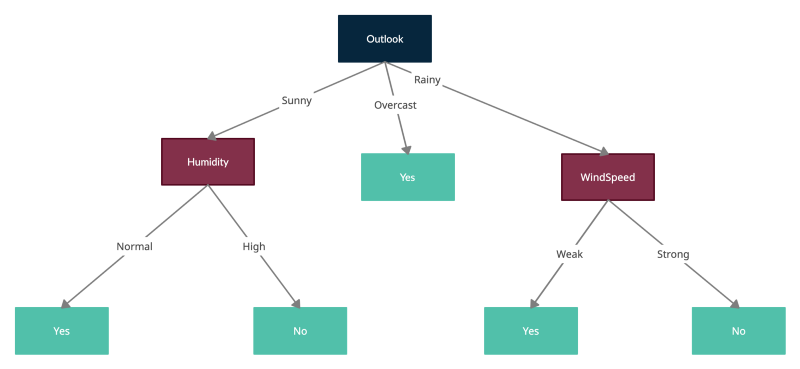